# New Step Indices Validation

### Squad - Derived Indices

#### Report Date : 22 April 2024


## Introduction

Due to delay-based exploits at the release of cTrader and to diversify our offerings, new variations of Step Indices are to be released in cTrader & MT5, while the original Step Index will stay in dTrader. The parameters of the upcoming indices are as below, with the original Step Index from dTrader as comparison:

### <u>DTrader</u>

|Old Indices|Step Size|Threshold|Starting Spot|Spread Value|
|:---------:|:-------:|:-------:|:-----------:|:----------:|
|Step Index 100|0.1|0.5|10,000|0.1|

### <u>MT5</u>

|New Indices|Step Size|Threshold|Starting Spot|Spread Value|
|:---------:|:-------:|:-------:|:-----------:|:----------:|
|Step Index 200|0.2|0.5|10,000|0.2|
|Step Index 500|0.5|0.5|10,000|0.5|

### <u>cTrader</u>

|New Indices|Step Size|Threshold|Starting Spot|Spread Value|
|:---------:|:-------:|:-------:|:-----------:|:----------:|
|Step Index 300|0.3|0.5|10,000|0.3|
|Step Index 400|0.4|0.5|10,000|0.4|

The step size, threshold and spread value are set in the config file, `steprng.yaml`.

## Product Information

### <ins>Product Description</ins>

Product Specifications
* Clickup: https://app.clickup.com/t/20696747/FEED-331
* Github PR: https://github.com/regentmarkets/bom-feed/pull/1269
* Specs: https://docs.google.com/spreadsheets/d/1VC6oDYmyhKvkQJsqLBZ2pE4yRUMpHVNp6Q3Hj0yAfds/edit#gid=0
* Trading Conditions: https://docs.google.com/spreadsheets/d/1VC6oDYmyhKvkQJsqLBZ2pE4yRUMpHVNp6Q3Hj0yAfds/edit#gid=0

The step indices are based on the additive random walk, a discrete process. It can be viewed as an approximation of stock prices in the real world, assuming steps are modelled additively, with fixed step sizes, as opposed to geometrically, like the Geometric Brownian Motion (Vol XX).

The index is generated every second.

The currently offered indices are:
* Step Index 100
* Step Index 200
* Step Index 300
* Step Index 400
* Step Index 500

Offered in the platforms described in the introduction.

### <ins>Construction -- Index</ins>
The spot price at time $t$ is defined based on the spot price a timestep before:

$$
S_t = S_{t-1} + s \cdot U
$$

Where

\begin{align*}
S &= \text{Spot Price} \\
s &= \text{Step Size} \\
U &= \text{Bernoulli Variable: } \mathcal{B}\left(1, -1 ; \frac{1}{2}\right)
\end{align*}

Where a Bernoulli distribution: $\mathcal{B}(a, b ; p)$ has two outcomes, $a, b$ with probability $p$, $1-p$ respectively.

### <ins>Construction -- Spread</ins>

The Step Index 100 spread was originally defined as an asymmetric spread to ensure that a pipsize of 0.1 is attained:

\begin{align*}
S_{bid} &= S_t \\
S_{ask} &= S_t + 0.1
\end{align*}

This is extended to the rest of the indices using the following formula:

\begin{align*}
S_{bid} &= S_t - 0.1 * \left\lfloor \frac{10 s}{2}\right\rfloor \\
S_{ask} &= S_t + 0.1 * \left\lceil \frac{10 s}{2}\right\rceil
\end{align*}

Where $\lfloor \cdot \rfloor$ is the floor function and $\lceil \cdot \rceil$ is the ceiling function. For example:

1. Step Index 100. We recover the existing (asymmetric) spread:
\begin{align*}
S_{bid} &= S_t - 0.1 * \left\lfloor \frac{10 \cdot 0.1}{2}\right\rfloor = \text{spot} - 0.1 * \left\lfloor 0.5\right\rfloor = \text{spot} \\
S_{ask} &= S_t + 0.1 * \left\lceil \frac{10 \cdot 0.1}{2}\right\rceil = \text{spot} + 0.1 * \left\lceil 0.5\right\rceil = \text{spot} + 0.1
\end{align*}

2. Step Index 400 (Symmetric spread):
\begin{align*}
S_{bid} &= S_t - 0.1 * \left\lfloor \frac{10 \cdot 0.4}{2}\right\rfloor = \text{spot} - 0.1 * \left\lfloor 2\right\rfloor = \text{spot} - 0.2 \\
S_{ask} &= S_t + 0.1 * \left\lceil \frac{10 \cdot 0.4}{2}\right\rceil = \text{spot} + 0.1 * \left\lceil 2\right\rceil = \text{spot} + 0.2
\end{align*}

**NOTE**: Spreads are set per platform, and not in BE/BO. As such, the only downloadable tick history that contains the spread is the MT5 spread. 

In summary:

|Index|Bid Spread|Ask Spread|
|:---:|:--------:|:--------:|
|Step Index 100|0|+0.1|
|Step Index 200|-0.1|+0.1|
|Step Index 300|-0.1|+0.2|
|Step Index 400|-0.2|+0.2|
|Step Index 500|-0.2|+0.3|

Important Dates:

|Date|Event|
|:--:|:---:|
|19 March 2024| DevServer release|
|20 March 2024| Random number fix (See next section)|
|22 March 2024| Spreads applied in platforms|
|26 March 2024| CTrader Demo release|
|4 April 2024| MT5 Demo release|

## Model Validation

### Summary

For the validation of Step Indices, we cover the below areas and conclude the outcomes. More details can be found in the respective sections.
Data Feeds are from the Demo release dates onwards.

|Section|Area|Validation|Outcome|Passed?|
|:-----:|:--|:--------|:-----|:-----:|
|1|Correlations|Correlations of the indices were checked. To prevent potential pair-wise trading advantages or arbitrage exploits, all pairwise correlation should be at 0.|**Issue** (19 March 2024): The indices all had correlation 1 due to using the same random numbers. <br> **Update** (Resolution - 20 March 2024):  Each index started using different random numbers; Pair-wise correlations were 0 from then on. |**Passed**|
|2|Long term moments & convergence|<li>Feed moment data computation and cross-checking with simulation moments <li> Moment convergence speed testing|<li> Feed volatilities match match simulations <li> Moments converge approximately within a week|<b>Passed</b>|
|3|Parameter Estimation| Parameters are backward engineered from the feed data: <li> Step size; <li> Threshold; <li> Spread.| The recovered parameters are accurate to pre-defined parameters|<b>Passed</b>|
|4|Client Trading Statistics|Win rates & Hit ratios for each index are checked|Investigations found some high-PnL clients (Over $1k profit per trade), but they are few, and likely emboldened by the large margins from Demo.|<b>Passed</b>|
|4|Probability of going negative|Since the indices use additive noise, there is a non-zero chance they can hit 0 in a specified time|Higher step sizes means higher chance to hit 0. In particular, Step Indices 400 & 500 have over 0.5% chance to hit 0 in 3 or 5 years|<b>Passed</b>|

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import pandas as pd
import seaborn as sns
from numba import njit
from utils import read_yaml, read_csv_feeddb, read_csv_MT5, read_csv_CT, read_csvs_CT
from matplotlib import gridspec
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
from functools import partial
import plotly.io as pio

pio.renderers.default = 'notebook'
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)


In [50]:
STEP_SPECS : dict = read_yaml('./config.yaml')
STEP_RNGS = list(STEP_SPECS.keys())
ORI_STEPS = ['stpRNG']
NEW_STEPS = STEP_RNGS[1:]
CTRADER_STEPS = ['stpRNG3', 'stpRNG4']
MT5_STEPS = ['stpRNG2', 'stpRNG5']

step_specs_df = pd.DataFrame.from_dict(STEP_SPECS)
# step_specs_df
# variance = pd.DataFrame({'variance' : {k : v['step_size']**2  for k,v in STEP_SPECS.items() }})
# variance

In [51]:
stpRNG_feeddb_dev  = read_csv_feeddb('./feeds/stpRNG_from-launch_feeddb_DevServer.csv')
stpRNG2_feeddb_dev = read_csv_feeddb('./feeds/stpRNG2_from-launch_feeddb_DevServer.csv')
stpRNG3_feeddb_dev = read_csv_feeddb('./feeds/stpRNG3_from-launch_feeddb_DevServer.csv')
stpRNG4_feeddb_dev = read_csv_feeddb('./feeds/stpRNG4_from-launch_feeddb_DevServer.csv')
stpRNG5_feeddb_dev = read_csv_feeddb('./feeds/stpRNG5_from-launch_feeddb_DevServer.csv')

stpRNG_feeddb_demo  = read_csv_feeddb('./feeds/stpRNG_from-demo_feeddb.csv')
stpRNG2_feeddb_demo = read_csv_feeddb('./feeds/stpRNG2_from-demo_feeddb.csv')
stpRNG3_feeddb_demo = read_csv_feeddb('./feeds/stpRNG3_from-demo_feeddb.csv')
stpRNG4_feeddb_demo = read_csv_feeddb('./feeds/stpRNG4_from-demo_feeddb.csv')
stpRNG5_feeddb_demo = read_csv_feeddb('./feeds/stpRNG5_from-demo_feeddb.csv')

stpRNG_MT5_dev  = read_csv_MT5('./feeds/Step Index_MT5_DEV_202403220911_202403221028.csv')
stpRNG2_MT5_dev = read_csv_MT5('./feeds/Step Index 2_MT5_DEV_202403220911_202403221028.csv')
stpRNG5_MT5_dev = read_csv_MT5('./feeds/Step Index 5_MT5_DEV_202403220911_202403221028.csv')

stpRNG2_MT5_demo = read_csv_MT5('./feeds/Step Index 200_MT5_Demo_202404040203_202404080338.csv')
stpRNG5_MT5_demo = read_csv_MT5('./feeds/Step Index 500_MT5_Demo_202404040203_202404080322.csv')

stpRNG_CT_dev  = read_csv_CT('./feeds/cB_TickData_StepIndex_2024-03-22___Created_2024-03-22_15-19.csv')
stpRNG3_CT_dev = read_csv_CT('./feeds/cB_TickData_StepIndex3_2024-03-22___Created_2024-03-22_15-17.csv')
stpRNG4_CT_dev = read_csv_CT('./feeds/cB_TickData_StepIndex4_2024-03-22___Created_2024-03-22_15-19.csv')

stpRNG3_CT_demo = read_csvs_CT([f'./feeds/cB_TickData_StepIndex3_2024-04-{i:02}.csv' for i in range(5,13)])
stpRNG4_CT_demo = read_csvs_CT([f'./feeds/cB_TickData_StepIndex4_2024-04-{i:02}.csv' for i in range(5,13)])


'''
SELECT underlying, ts, bid, spot, ask
FROM feed.tick
WHERE underlying IN ('{underlying}') 
AND ts >= '2024-03-20 07:50:00'
ORDER BY ts, underlying
'''

# Release time
stpRNG_Dev_start_time = '2024-03-19 03:03:23'

# Actually using separate random variables :/
stpRNG_Dev_proper_time = '2024-03-20 07:50:00'

stpRNG_MT5_Spread_Dev_start_time = stpRNG_MT5_dev.ts.iloc[0]
stpRNG_MT5_Spread_Dev_end_time = '2024.03.22 10:28:10'

stpRNG_CT_Dev_start_time = '22/03/2024 00:00:00'
stpRNG_CT_Dev_end_time = '22/03/2024 13:17:54'

stpRNG_MT5_Demo_start_time = '2024.04.04 02:03:31'
stpRNG_MT5_Demo_end_time = '2024.04.08 03:22:48'

stpRNG_CT_Demo_start_time = '2024-04-05 00:00:00'
stpRNG_CT_Demo_end_time = '2024-04-12 06:46:30'


stepRNGs_feeddb_dev = dict(zip(sorted(STEP_RNGS), [stpRNG_feeddb_dev, stpRNG2_feeddb_dev, stpRNG3_feeddb_dev, stpRNG4_feeddb_dev, stpRNG5_feeddb_dev]))
for stp in STEP_RNGS:
    id = stepRNGs_feeddb_dev[stp]
    id.set_index('ts', inplace=True)
    id.drop(id[id.index < stpRNG_Dev_proper_time].index, inplace=True)

stepRNGs_feeddb_demo = dict(zip(sorted(STEP_RNGS), [stpRNG_feeddb_demo, stpRNG2_feeddb_demo, stpRNG3_feeddb_demo, stpRNG4_feeddb_demo, stpRNG5_feeddb_demo]))
for stp in STEP_RNGS:
    id = stepRNGs_feeddb_demo[stp]
    id.set_index('ts', inplace=True)
    id.drop(id[(id.index < stpRNG_MT5_Demo_start_time) & (id.index >= stpRNG_MT5_Demo_end_time)].index, inplace=True)

stepRNGs_MT5_dev = dict(zip(sorted(MT5_STEPS), [stpRNG_MT5_dev, stpRNG2_MT5_dev, stpRNG5_MT5_dev]))
for stp in MT5_STEPS:
    id = stepRNGs_MT5_dev[stp]
    id.set_index('ts', inplace=True)
    id.index = id.index.floor('1s')
    id = id[~id.index.duplicated(keep='first')]
    stepRNGs_MT5_dev[stp] = id
    id.insert(1, 'spot', id['bid'] + 0.1 * ((10 * STEP_SPECS[stp]['spread']) // 2))
    id.drop(id[(id.index < stpRNG_MT5_Spread_Dev_start_time) | (id.index >= stpRNG_MT5_Spread_Dev_end_time)].index, inplace=True)

stepRNGs_MT5_demo = dict(zip(sorted(MT5_STEPS), [stpRNG2_MT5_demo, stpRNG5_MT5_demo]))
for stp in MT5_STEPS:
    id = stepRNGs_MT5_demo[stp]
    id.set_index('ts', inplace=True)
    id.index = id.index.floor('1s')
    id = id[~id.index.duplicated(keep='first')]
    stepRNGs_MT5_demo[stp] = id
    id.insert(1, 'spot', id['bid'] + 0.1 * ((10 * STEP_SPECS[stp]['spread']) // 2))
    id.drop(id[(id.index < stpRNG_MT5_Demo_start_time) | (id.index >= stpRNG_MT5_Demo_end_time)].index, inplace=True)

stepRNGs_CT_dev = dict(zip(sorted(CTRADER_STEPS), [stpRNG3_CT_dev, stpRNG4_CT_dev]))
for stp in CTRADER_STEPS:
    id = stepRNGs_CT_dev[stp]
    id.set_index('ts', inplace=True)
    id.index = id.index.floor('1s')
    id = id[~id.index.duplicated(keep='first')]
    stepRNGs_CT_dev[stp] = id
    id.insert(1, 'spot', id['bid'])
    id.drop(id[(id.index < stpRNG_CT_Dev_start_time) | (id.index >= stpRNG_CT_Dev_end_time)].index, inplace=True)

stepRNGs_CT_demo = dict(zip(sorted(CTRADER_STEPS), [stpRNG3_CT_demo, stpRNG4_CT_demo]))
for stp in CTRADER_STEPS:
    id = stepRNGs_CT_demo[stp]
    id.set_index('ts', inplace=True)
    id.index = id.index.floor('1s')
    
    id = id[~id.index.duplicated(keep='first')]
    stepRNGs_CT_demo[stp] = id
    id.insert(1, 'spot', id['bid'])
    id.drop(id[(id.index < stpRNG_CT_Demo_start_time) | (id.index >= stpRNG_CT_Demo_end_time)].index, inplace=True)

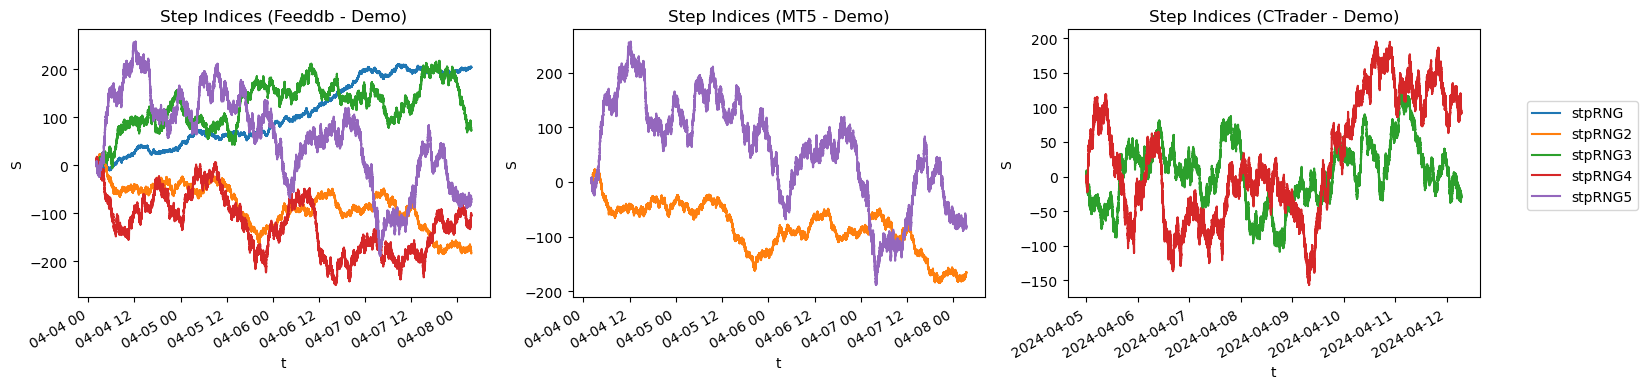

In [52]:
def plot_feeds(source_labels, feeds_dict, name, color=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for stp in source_labels:
        if color is None:
            ax.plot((feeds_dict[stp]['spot'] - feeds_dict[stp]['spot'].iloc[0]), label=stp)
        else:
            ax.plot((feeds_dict[stp]['spot'] - feeds_dict[stp]['spot'].iloc[0]), label=stp, color=color[stp])
    ax.set_title(f'Step Indices ({name})')
    ax.set_xlabel('t')
    ax.set_ylabel('S')
    return ax

fig, axes = plt.subplots(1,3, figsize=(15, 4))
plot_feeds(STEP_RNGS, stepRNGs_feeddb_demo, 'Feeddb - Demo', ax=axes[0])
h, l = axes[0].get_legend_handles_labels()

plot_feeds(MT5_STEPS, stepRNGs_MT5_demo, 'MT5 - Demo', color = {l._label : l._color for l in axes[0].lines 
                                                                if l._label in MT5_STEPS}, ax=axes[1])

plot_feeds(CTRADER_STEPS, stepRNGs_CT_demo, 'CTrader - Demo', color = {l._label : l._color for l in axes[0].lines 
                                                                       if l._label in CTRADER_STEPS}, ax=axes[2])
fig.autofmt_xdate()
fig.tight_layout()
fig.legend(h,l, bbox_to_anchor=(1.1, 0.75))


# plot_feeds(MT5_STEPS, stepRNGs_MT5_demo, 'MT5 - Demo')
# plot_feeds(CTRADER_STEPS, stepRNGs_CT_demo, 'CTrader - Demo')

In [53]:
def step_rng(random_numbers, initial_spot, step_size, threshold, spread):
    dim = random_numbers.shape
    steps = np.where(random_numbers > threshold, step_size, -step_size)
    if len(dim) > 1:
        x = np.full((dim[0], dim[1]+1), 0.0)
        x[:,1:] = np.cumsum(steps, axis=1)
    else:
        x = np.full((dim[0]+1,), 0.0)
        x[1:] = np.cumsum(steps)
    return initial_spot + x

In [54]:
step_samples = dict(zip(STEP_RNGS, [0] * len(STEP_RNGS))) 
simple_returns = dict(zip(STEP_RNGS, [0] * len(STEP_RNGS))) 
log_returns = dict(zip(STEP_RNGS, [0] * len(STEP_RNGS))) 
duration_samples = 86400 * 365
DT = 1/duration_samples

for label in STEP_RNGS:
    random_numbers = np.random.uniform(0,1,size=(duration_samples))
    steps = step_rng(random_numbers, **(STEP_SPECS[label]))
    step_samples[label] = steps
    simple_returns[label] = np.diff(steps) / steps[:-1]
    log_returns[label] = np.log(steps[1:]/steps[:-1])

In [55]:
def get_returns(source_labels, feeds_dict):
    simple_returns = dict(zip(source_labels, [0] * len(source_labels))) 
    log_returns = dict(zip(source_labels, [0] * len(source_labels))) 

    for label in source_labels:
        steps = feeds_dict[label]['spot']
        simple_returns[label] = steps.diff() / steps.shift(1)
        log_returns[label] = np.log(steps/steps.shift(1))
    
    return simple_returns, log_returns

simple_returns_feeddb_dev, log_returns_feeddb_dev = get_returns(STEP_RNGS, stepRNGs_feeddb_dev)
simple_returns_feeddb_demo, log_returns_feeddb_demo = get_returns(STEP_RNGS, stepRNGs_feeddb_demo)
simple_returns_MT5_dev, log_returns_MT5_dev = get_returns(MT5_STEPS, stepRNGs_MT5_dev)
simple_returns_MT5_demo, log_returns_MT5_demo = get_returns(MT5_STEPS, stepRNGs_MT5_demo)
simple_returns_CT_dev, log_returns_CT_dev = get_returns(CTRADER_STEPS, stepRNGs_CT_dev)
simple_returns_CT_demo, log_returns_CT_demo = get_returns(CTRADER_STEPS, stepRNGs_CT_demo)

In [56]:
MCs = dict(zip(STEP_RNGS, [0] * len(STEP_RNGS)))

iterations = 2000
duration = 86400 // 2

for label in STEP_RNGS:
    random_numbers = np.random.uniform(0,1,size=(iterations, duration))

    MCs[label] = step_rng(random_numbers, **(STEP_SPECS[label]))

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2,2, hspace=0.3)
for i_raw, label in enumerate(NEW_STEPS):
    mc = MCs[label]
    endpoint_dist = mc[:,-1]
    i, j = divmod(i_raw, 2)
    gs_sub = gs[i,j].subgridspec(1,2, width_ratios=[3,1], wspace=0.05)

    ax_main = fig.add_subplot(gs_sub[0]);
    ax_main.set_title(f'{label} Paths');
    for i in range(mc.shape[0]):
        ax_main.plot(mc[i,:])
    ax_main.set_xlabel('t');
    ax_main.set_ylabel('S');

    ax_end = fig.add_subplot(gs_sub[1], sharey=ax_main);
    ax_end.hist(endpoint_dist, orientation='horizontal', bins=100, density=True);
    plt.setp(ax_end.get_xticklabels(), visible=False);
    plt.setp(ax_end.get_yticklabels(), visible=False);

fig.suptitle('Monte-Carlo Simulation');
plt.plot()

### 1. Correlations

We check correlations of the log returns. We expect all pair-wise correlations to be 0, otherwise it opens up arbitrage exploits and pair-wise trading opportunities across Step Indices.

We check:

* All Step Indices;
* MT5 Step Indices;
* cTrader Step Indices.

#### Observations
Between 19-20 March 2024, all the step indices used the same random numbers during generation, hence all correlations were exactly 1. This issue has been resolved since 20 March 2024.

#### Result
We clearly see that no step indices are pairwise-correlated.

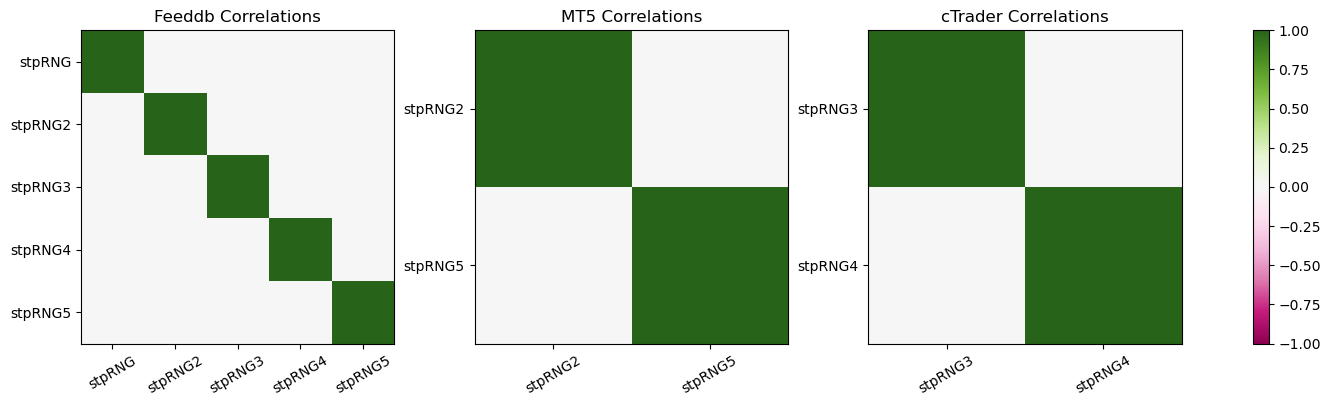

In [85]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
### Correlations

corrs_feeddb_demo = pd.DataFrame.from_dict(log_returns_feeddb_demo).corr()
corrs_MT5_demo = pd.DataFrame.from_dict(log_returns_MT5_demo).corr()
corrs_CT_demo = pd.DataFrame.from_dict(log_returns_CT_demo).corr()

axes[0].imshow(corrs_feeddb_demo, cmap = 'PiYG', vmin=-1, vmax=1)
axes[0].set_title('Feeddb Correlations')
axes[0].set_xticks(np.arange(len(STEP_RNGS)), labels=STEP_RNGS, rotation=30)
axes[0].set_yticks(np.arange(len(STEP_RNGS)), labels=STEP_RNGS)

axes[1].imshow(corrs_MT5_demo, cmap = 'PiYG', vmin=-1, vmax=1)
axes[1].set_title('MT5 Correlations')
axes[1].set_xticks(np.arange(len(MT5_STEPS)), labels=MT5_STEPS, rotation=30)
axes[1].set_yticks(np.arange(len(MT5_STEPS)), labels=MT5_STEPS)

im3 = axes[2].imshow(corrs_CT_demo, cmap = 'PiYG', vmin=-1, vmax=1)
axes[2].set_title('cTrader Correlations')
axes[2].set_xticks(np.arange(len(CTRADER_STEPS)), labels=CTRADER_STEPS, rotation=30)
axes[2].set_yticks(np.arange(len(CTRADER_STEPS)), labels=CTRADER_STEPS)

plt.tight_layout(pad=0.5)
fig.colorbar(im3, ax=axes.ravel().tolist());
# corrs.iloc[:,::-1].iplot(kind='heatmap', zmin=-1, zmax=1, colorscale='piyg',title='Step Index Correlations')

### 2. Long Term Moments & Convergence

We check the long-term moments of the log returns. 

* By symmetry, we would like skew and drift to be 0, but drift may be far from 0 due to the very tiny relative change per step.
* Volatility is expected to be roughly around the following values based on previous Monte-Carlo calculations:

|Index|Volatility|
|:---:|:--------:|
|Step Index 100|7%|
|Step Index 200|11%|
|Step Index 300|16%|
|Step Index 400|23%|
|Step Index 500|30%|

* Excess kurtosis is expected to be around -2, i.e it is thinner tailed than the normal distribution

Note that in longer periods of time, the moments can converge to different values due to the indices' additive nature.

##### Results
The moments are within expected values.

In [57]:
def get_moments(source_labels, log_returns_dict, name):
    step_drift = dict(zip(source_labels, [0,0,0,0]))
    step_vol = dict(zip(source_labels, [0,0,0,0]))
    step_skew = dict(zip(source_labels, [0,0,0,0]))
    step_kurt = dict(zip(source_labels, [0,0,0,0]))

    DT = 1/(365*86400)

    for label in source_labels:
        lr = log_returns_dict[label]
        step_drift[label] = lr.mean() / DT
        step_vol[label] = lr.std() / np.sqrt(DT)
        step_skew[label] = lr.skew()
        step_kurt[label] = lr.kurt()

    moments = {'drift'        : step_drift,
                    'vol'         : step_vol,
                    'skew'        : step_skew,
                    'E. kurtosis' : step_kurt}
    
    return step_drift, step_vol, step_skew, step_kurt, pd.DataFrame.from_dict(moments).rename_axis(name + ' Moments', axis=1)

step_feeddb_drift, step_feeddb_vol, step_feeddb_skew, step_feeddb_kurt, moments_feeddb_df = get_moments(STEP_RNGS, log_returns_feeddb_demo, 'Feeddb - Demo')
step_MT5_drift, step_MT5_vol, step_MT5_skew, step_MT5_kurt, moments_MT5_df = get_moments(MT5_STEPS, log_returns_MT5_demo, 'MT5 - Demo')
step_CT_drift, step_CT_vol, step_CT_skew, step_CT_kurt, moments_CT_df = get_moments(CTRADER_STEPS, log_returns_CT_demo, 'CTrader - Demo')
display(moments_feeddb_df)
display(moments_MT5_df)
display(moments_CT_df)

Feeddb - Demo Moments,drift,vol,skew,E. kurtosis
stpRNG,2.237478,0.068643,-0.011600,-1.999531
stpRNG2,-1.612218,0.110206,0.005189,-1.999875
stpRNG3,0.616094,0.158678,-0.001337,-1.999879
stpRNG4,-0.953597,0.228578,0.001479,-1.999834
stpRNG5,-0.679673,0.303070,0.000808,-1.999559


MT5 - Demo Moments,drift,vol,skew,E. kurtosis
stpRNG2,-1.462504,0.110204,0.004777,-1.999702
stpRNG5,-0.814987,0.303056,0.000965,-1.999559


CTrader - Demo Moments,drift,vol,skew,E. kurtosis
stpRNG3,-0.120483,0.158535,0.000356,-1.999660
stpRNG4,0.464615,0.227817,-0.000865,-1.996621


#### Convergence
The faster the convergence of moments the better. 

Note that the drift and volatility will particularly slowly converge as they give more weight to smaller movements (all of them, if you consider log returns) as opposed to skew and kurtosis.

##### Results
The drift, skew and kurtosis converge within 3 days. Volatility seems to have a hard time converging however, though this is no issue, since log-returns on Step Indices are inherently biased to low values & the movement of the indices will heavily affect the final value.

Do note the jumps in the cTrader indices. These result from some short feed losses.

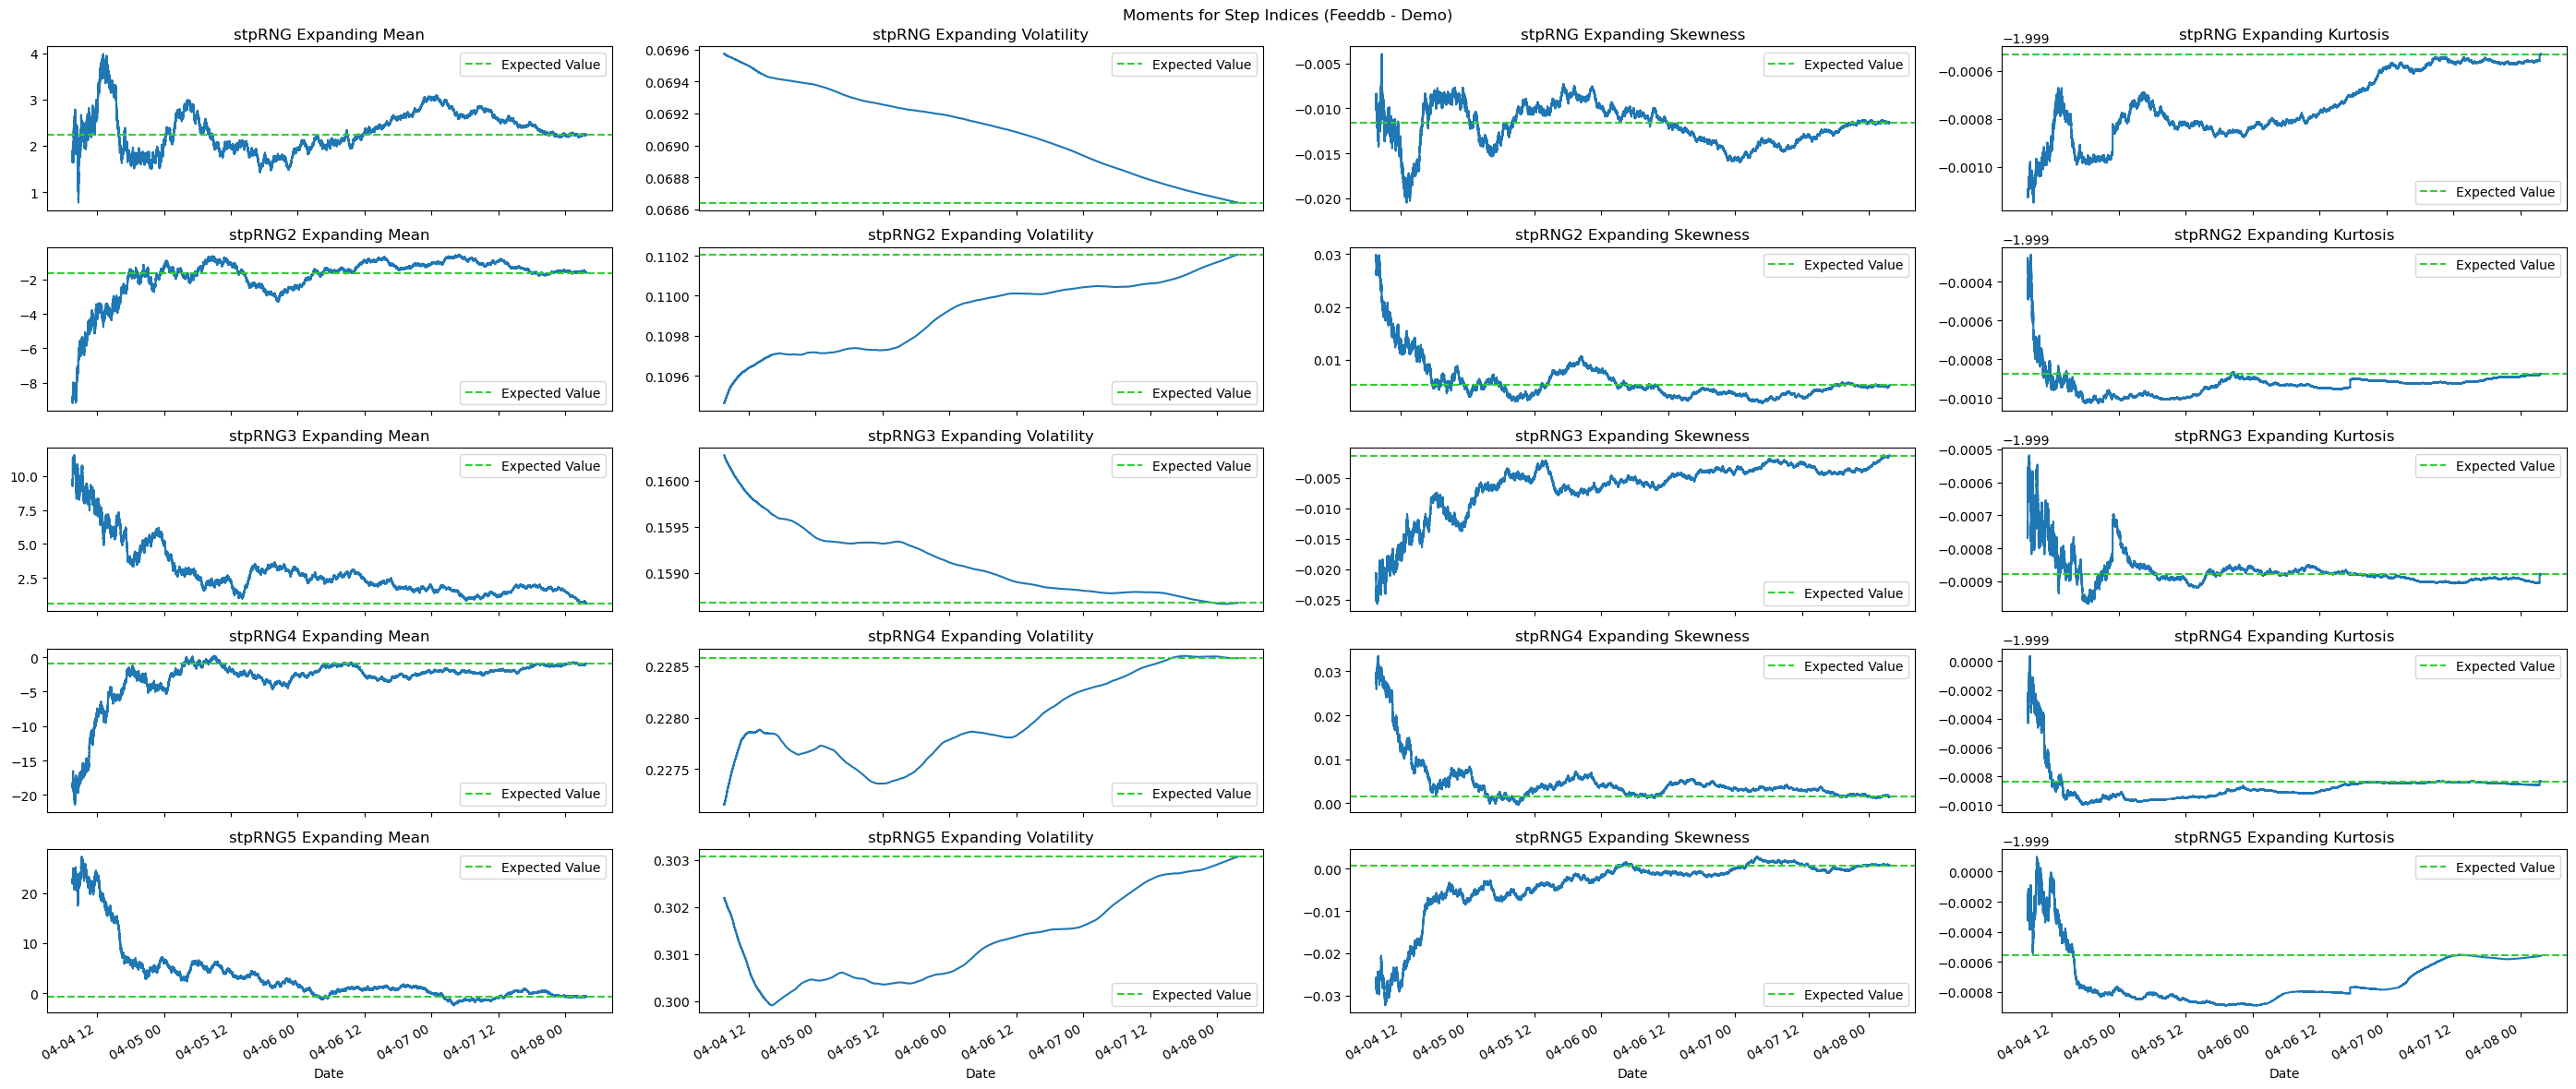

In [44]:
gap = 20_000

# Careful when running this, it can potentially kill the kernel if used on large durations
fig, ax = plt.subplots(len(STEP_RNGS),4, figsize = (28,12))
for i, label in enumerate(STEP_RNGS):
    sr = pd.Series(log_returns_feeddb_demo[label])
    expanding_period = sr.expanding(gap)
    cum_mean = expanding_period.mean() / DT
    cum_vols = expanding_period.std() / np.sqrt(DT)
    cum_skews = expanding_period.skew()
    cum_kurts = expanding_period.kurt()

    # Plot Jump cumulative jump frequency
    ax[i,0].plot(cum_mean)
    ax[i,0].axhline(step_feeddb_drift[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,0].set_title(f'{label} Expanding Mean')
    ax[i,0].legend()

    ax[i,1].plot(cum_vols)
    ax[i,1].axhline(step_feeddb_vol[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,1].set_title(f'{label} Expanding Volatility')
    ax[i,1].legend()

    ax[i,2].plot(cum_skews)
    ax[i,2].axhline(step_feeddb_skew[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,2].set_title(f'{label} Expanding Skewness')
    ax[i,2].legend()

    ax[i,3].plot(cum_kurts)
    ax[i,3].axhline(step_feeddb_kurt[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,3].set_title(f'{label} Expanding Kurtosis')
    ax[i,3].legend()

    for j in range(4):
        ax[i,j].set_xlabel('Date')
    
fig.autofmt_xdate(rotation=30)
fig.suptitle(f"Moments for Step Indices (Feeddb - Demo)")
plt.tight_layout()
plt.show()

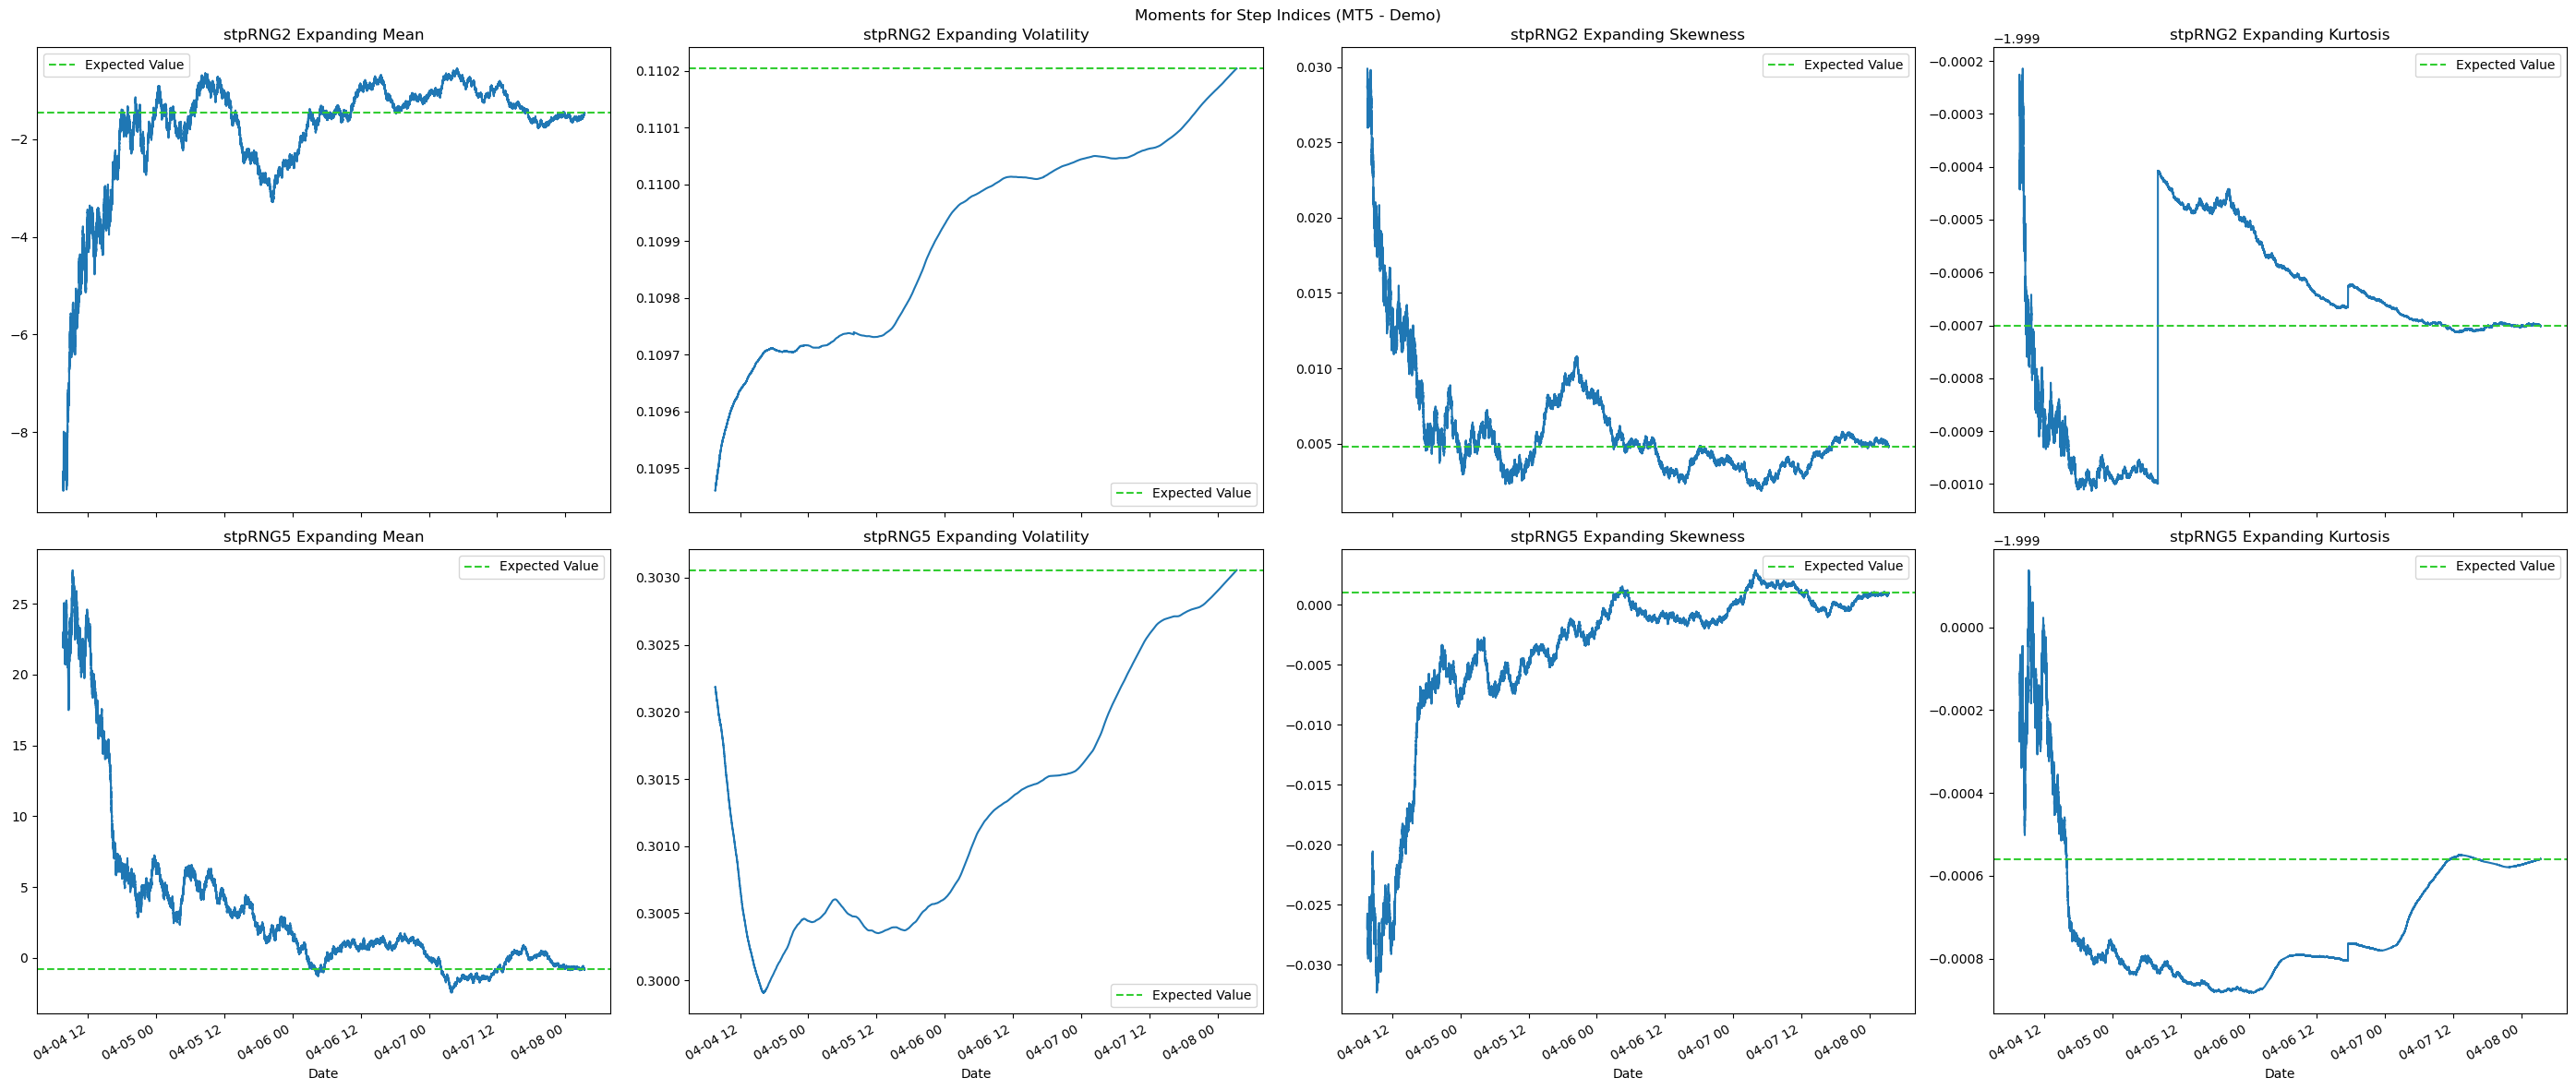

In [45]:
gap = 20_000

# Careful when running this, it can potentially kill the kernel if used on large durations
fig, ax = plt.subplots(len(MT5_STEPS),4, figsize = (28,12))
for i, label in enumerate(MT5_STEPS):
    sr = pd.Series(log_returns_MT5_demo[label])
    expanding_period = sr.expanding(gap)
    cum_mean = expanding_period.mean() / DT
    cum_vols = expanding_period.std() / np.sqrt(DT)
    cum_skews = expanding_period.skew()
    cum_kurts = expanding_period.kurt()

    # Plot Jump cumulative jump frequency
    ax[i,0].plot(cum_mean)
    ax[i,0].axhline(step_MT5_drift[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,0].set_title(f'{label} Expanding Mean')
    ax[i,0].legend()

    ax[i,1].plot(cum_vols)
    ax[i,1].axhline(step_MT5_vol[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,1].set_title(f'{label} Expanding Volatility')
    ax[i,1].legend()

    ax[i,2].plot(cum_skews)
    ax[i,2].axhline(step_MT5_skew[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,2].set_title(f'{label} Expanding Skewness')
    ax[i,2].legend()

    ax[i,3].plot(cum_kurts)
    ax[i,3].axhline(step_MT5_kurt[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,3].set_title(f'{label} Expanding Kurtosis')
    ax[i,3].legend()

    for j in range(4):
        ax[i,j].set_xlabel('Date')
    
fig.autofmt_xdate(rotation=30)
fig.suptitle(f"Moments for Step Indices (MT5 - Demo)")
plt.tight_layout()
plt.show()

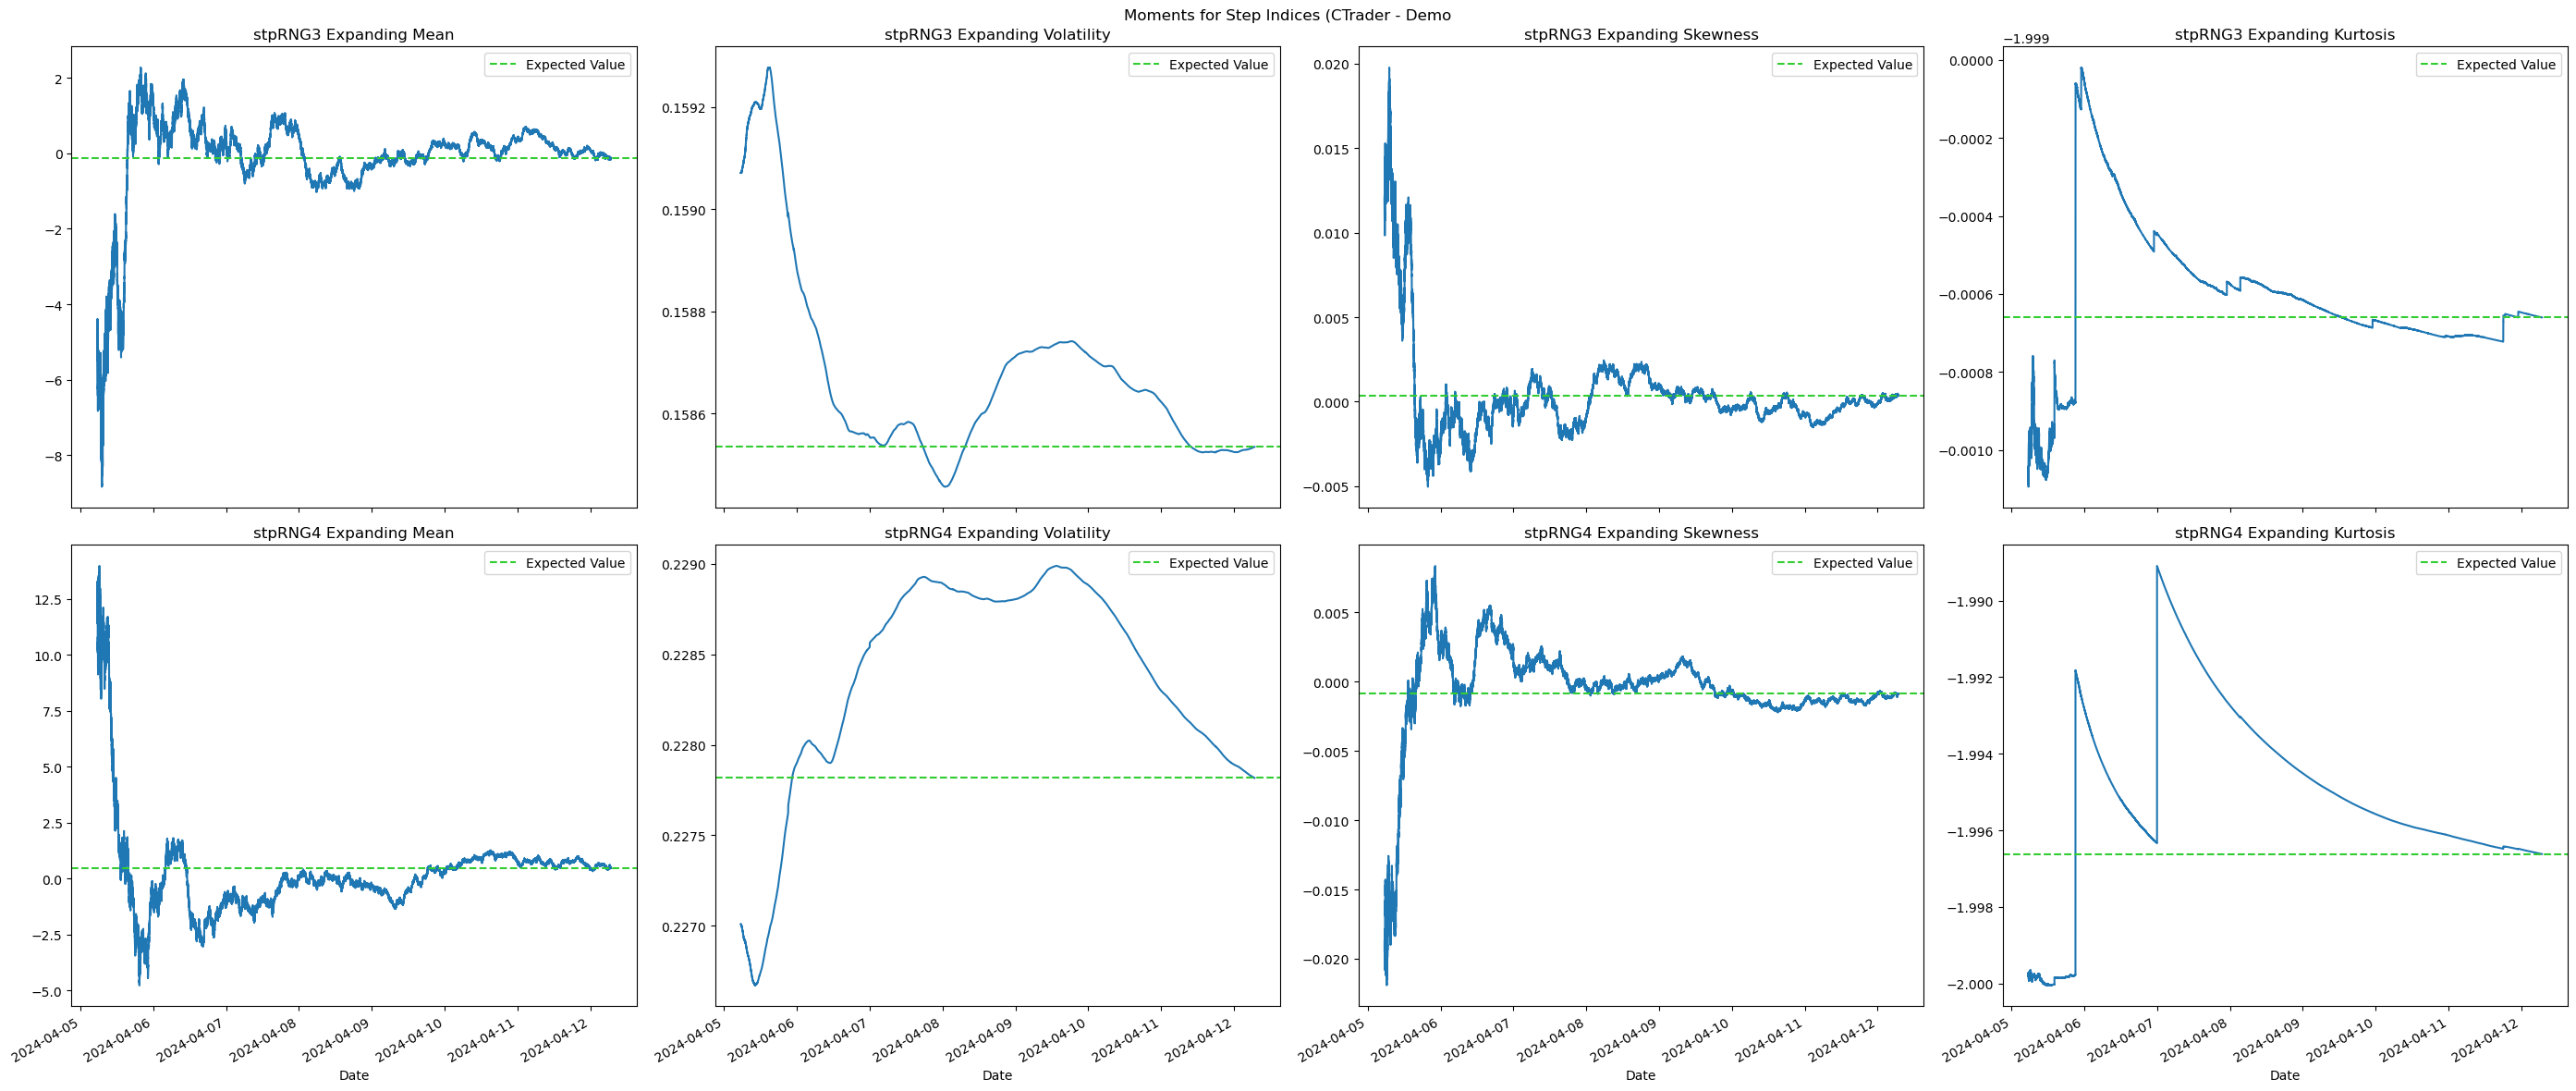

In [17]:
gap = 20_000

# Careful when running this, it can potentially kill the kernel if used on large durations
fig, ax = plt.subplots(len(CTRADER_STEPS),4, figsize = (28,12))
for i, label in enumerate(CTRADER_STEPS):
    sr = pd.Series(log_returns_CT_demo[label])
    expanding_period = sr.expanding(gap)
    cum_mean = expanding_period.mean() / DT
    cum_vols = expanding_period.std() / np.sqrt(DT)
    cum_skews = expanding_period.skew()
    cum_kurts = expanding_period.kurt()

    # Plot Jump cumulative jump frequency
    ax[i,0].plot(cum_mean)
    ax[i,0].axhline(step_CT_drift[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,0].set_title(f'{label} Expanding Mean')
    ax[i,0].legend()

    ax[i,1].plot(cum_vols)
    ax[i,1].axhline(step_CT_vol[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,1].set_title(f'{label} Expanding Volatility')
    ax[i,1].legend()

    ax[i,2].plot(cum_skews)
    ax[i,2].axhline(step_CT_skew[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,2].set_title(f'{label} Expanding Skewness')
    ax[i,2].legend()

    ax[i,3].plot(cum_kurts)
    ax[i,3].axhline(step_CT_kurt[label], color='limegreen', ls = '--', label='Expected Value')
    ax[i,3].set_title(f'{label} Expanding Kurtosis')
    ax[i,3].legend()

    for j in range(4):
        ax[i,j].set_xlabel('Date')
    
fig.autofmt_xdate(rotation=30)
fig.suptitle(f"Moments for Step Indices (CTrader - Demo")
plt.tight_layout()
plt.show()

### 3. Parameter Estimation
We estimate the index parameters as a sanity check.

#### Step size

Step sizes should be constant for each index

##### Results
All step sizes match the specs

In [41]:
def step_size_checker(source_labels, feed_dict, name):
    step_size_dict = {label : {'expected' : STEP_SPECS[label]['step_size']} for label in source_labels}

    for label in source_labels:
        feed = feed_dict[label]['spot']
        step_sizes = abs(np.diff(feed, n=1)).flatten()

        step_size_dict[label]['average'] = step_sizes.mean()
        step_size_dict[label]['error'] = (step_size_dict[label]['expected'] - step_size_dict[label]['average']) / step_size_dict[label]['expected']

    return pd.DataFrame.from_dict(step_size_dict, orient='index',).rename_axis(name + ' Step Sizes', axis=1)

step_sizes_feeddb_df = step_size_checker(STEP_RNGS, stepRNGs_feeddb_demo, 'Feeddb - Demo')
step_sizes_MT5_df = step_size_checker(MT5_STEPS, stepRNGs_MT5_demo, 'MT5 - Demo')
step_sizes_CT_df = step_size_checker(CTRADER_STEPS, stepRNGs_CT_demo, 'CTrader - Demo')
display(step_sizes_feeddb_df)
display(step_sizes_MT5_df)
display(step_sizes_CT_df)

Feeddb - Demo Step Sizes,expected,average,error
stpRNG,0.1,0.100000,-0.000003
stpRNG2,0.2,0.199999,0.000003
stpRNG3,0.3,0.300001,-0.000003
stpRNG4,0.4,0.399999,0.000003
stpRNG5,0.5,0.499999,0.000003


MT5 - Demo Step Sizes,expected,average,error
stpRNG2,0.2,0.200001,-0.000003
stpRNG5,0.5,0.499999,0.000003


CTrader - Demo Step Sizes,expected,average,error
stpRNG3,0.3,0.300002,-0.000006
stpRNG4,0.4,0.400003,-0.000006


#### Threshold

The step distribution must be symmetrical, that is there is an equal chance of going up or down.

##### Results
We see all the probabilities are 0.5, as expected.

In [42]:
def probability_checker(source_labels, feed_dict, name):
    probability_dict = {label : {'expected' : STEP_SPECS[label]['threshold']} for label in source_labels}

    for label in source_labels:
        feed = feed_dict[label]['spot']
        probability_samples = (np.diff(feed, n=1) > 0).flatten()

        probability_dict[label]['average'] = probability_samples.mean()
        probability_dict[label]['error'] = (probability_dict[label]['expected'] - probability_dict[label]['average']) / probability_dict[label]['expected']

    return pd.DataFrame.from_dict(probability_dict, orient='index',).rename_axis(name + ' Probabilities', axis=1)

probability_feeddb_df = probability_checker(STEP_RNGS, stepRNGs_feeddb_demo, 'Feeddb - Demo')
probability_MT5_df = probability_checker(MT5_STEPS, stepRNGs_MT5_demo, 'MT5 - Demo')
probability_CT_df = probability_checker(CTRADER_STEPS, stepRNGs_CT_demo, 'CTrader - Demo')
display(probability_feeddb_df)
display(probability_MT5_df)
display(probability_CT_df)

Feeddb - Demo Probabilities,expected,average,error
stpRNG,0.5,0.502899,-0.005798
stpRNG2,0.5,0.498697,0.002606
stpRNG3,0.5,0.500339,-0.000677
stpRNG4,0.5,0.499624,0.000751
stpRNG5,0.5,0.499798,0.000404


MT5 - Demo Probabilities,expected,average,error
stpRNG2,0.5,0.498814,0.002372
stpRNG5,0.5,0.499759,0.000482


CTrader - Demo Probabilities,expected,average,error
stpRNG3,0.5,0.499920,0.000161
stpRNG4,0.5,0.500172,-0.000345


#### Spread

We check the feeds to recover and verify the expected spread structure. Note that since spreads are implemented per platform, only MT5 feeds contain the spread. However, cTrader and dTrader do display the spreads in their live feeds.


##### Results
The MT5 spreads below are accurate to the expected spread. Both DTrader and CT show the correct spread in their respective platforms.

In [ ]:
def spread_checker(source_labels, feed_dict, name):
    spread_dict = {label : {'expected' : STEP_SPECS[label]['spread']} for label in source_labels}

    for label in source_labels:
        feed = feed_dict[label][['bid', 'ask']]
        spread_samples = (feed['ask'] - feed['bid'])

        spread_dict[label]['average'] = spread_samples.mean()
        spread_dict[label]['error'] = (spread_dict[label]['expected'] - spread_dict[label]['average']) / spread_dict[label]['expected']

    return pd.DataFrame.from_dict(spread_dict, orient='index',).rename_axis(name + ' Spreads', axis=1)

# spread_feeddb_df = spread_checker(STEP_RNGS, stepRNGs_feeddb_dev, 'Feeddb')
spread_MT5_df = spread_checker(MT5_STEPS, stepRNGs_MT5_demo, 'MT5')
# display(spread_feeddb_df)
display(spread_MT5_df)

MT5 Spreads,expected,average,error
stpRNG2,0.2,0.2,5.551115e-16
stpRNG5,0.5,0.5,0.000000e+00


### 4. Client Trading Statistics

We check the win rates and hit ratios (Company-side) per symbol. Trades are from Demo launch to 16 April 2024:

```
CT:
Step Index 200
win rate: 0.4326315464997996
hit ratio: 0.5227078152666138

Step Index 500
win rate: 0.4621082230299705
hit ratio: 0.5128024458913704

MT5:

Step Index 100 (Real)
win rate: 0.4108049653002795
hit ratio: 0.5482392331207934

Step Index 300
Hit Ratio: 0.5378588601916308
Win Rate: 0.5017886178861789

Step Index 400
Hit Ratio: 0.3138068732494188
Win Rate: 0.3970238095238095
```

Despite the sub-par win rates, investigation of clients & their trading behaviours indicate no particular strategies or exploits being used. A bulk of client profits were made with high volume trades due to high margins from Demo, which typically netted over $1,000 profit per trade for the client.

MV team agrees with the Specialized Dealers (![Slack](https://deriv-group.slack.com/archives/C05G8JW13JL/p1713514448529509?thread_ts=1712224309.766129&cid=C05G8JW13JL)) that these trades are no indicator of a greater problem, and will likely subside when margins are more meaningfukl, or be offset by general client trades once released to Real.

### 5. Probability of going negative in specified time

We note that since these indices are additive, there is a non-zero chance that at some point, the index will go to 0 (and hence negative). We estimate the likelihood this happens within 1, 3, 5 years.

We do so using the following formula (c.f appendix):

$$
\mathbb{P}(S_n \leq 0) = \mathbb{P}\left(Z  \leq \frac{-S_0}{s\sqrt{n}}\right)
$$

For initial spot $S_0$ and step size $s$. For example, if we had a step index with steps $\pm 1$ starting at 10,000, the probability of going negative within a year would be

$$
\mathbb{P}(10,000+ S_n \leq 0) \approx \mathbb{P}\left(Z  \leq \frac{-10,\!000}{\sqrt{86400 \cdot 365}}\right) \approx 3.6\%
$$

##### Results

Evidently, at some point, the indices are likely to require a reset, most notably stpRNG4 & stpRNG5, with over 0.5% chance of hitting 0 beyond 3 years

In [57]:
def prob_neg(x,n,p,a,b):
    single_mean = p * a + (1-p)*b
    single_var = p * (1-p) * (a-b)**2
    return norm.cdf(-(x - n * single_mean)/np.sqrt(n * single_var))


probabilities_negative = dict(zip(STEP_RNGS, [0] * len(STEP_RNGS)))
labels = ['1 year', '3 years', '5 years']
times = np.array([1,3,5]) * 86400 * 365
for label in STEP_RNGS:
    specs = STEP_SPECS[label]

    p = specs['threshold']
    s = specs['step_size']
    x = specs['initial_spot']
    probs = prob_neg(x, times, p, s, -s) * 100

    probabilities_negative[label] = dict(zip(labels, probs))

probabilities_negative_df = pd.DataFrame.from_dict(probabilities_negative, orient='index')
probabilities_negative_df.columns.name = ''
display(probabilities_negative_df)


,1 year,3 years,5 years
stpRNG,3.104674e-69,4.290870e-23,8.352448e-14
stpRNG2,2.702672e-17,1.369980e-05,3.419468e-03
stpRNG3,1.462546e-07,3.051382e-02,3.970747e-01
stpRNG4,4.257457e-04,5.081196e-01,2.324537e+00
stpRNG5,1.844071e-02,1.988146e+00,5.561058e+00


## Appendix

### Step Index Moments

We can formulate the Step Index as the following: 

Let $X \sim B_p(a,b)$ where $B_p(a,b)$ is a Bernoulli distribution on support $\{a,b\}$ with $\mathbb{P}(X=a) = p$. Then consider $X_i$ independent and identically distributed to $X$ and a starting point $X_0$. For any given $n > 0$, the step index is:

$$
S_n = S_0 + \sum_{i=1}^n X_i
$$

We notice further that:

$$
S_n - S_0 = \sum_{i=1}^n X_i
$$

has a binomial distribiution, which will make way for the normal approximation used in the next section. That aside, the mean/variance of $X$ and $S_n$ are as follows:

$$
\mathbb{E}[X] = pa + (1-p)b
$$

$$
\mathbb{V}[X] = pa^2 + (1-p)b^2 - (pa + (1-p)b)^2 = p(1-p)(a-b)^2
$$

$$
\mathbb{E}[S_n] = S_0 + n\mathbb{E}[X] = S_0 + n[pa + (1-p)b]
$$

$$
\mathbb{V}[S_n] = n \mathbb{V}[X] = np(1-p)(a-b)^2
$$

For step indices, this reduces to:

$$
\mathbb{E}[X] = 0
$$

$$
\mathbb{V}[X] = s^2
$$

$$
\mathbb{E}[S_n] = S_0
$$

$$
\mathbb{V}[S_n] = n s^2
$$

Where $s$ is the step-size.



### Probability of going negative in a specified time

We'd like to estimate the probability of the step index hitting 0 (and consequently, going negative). We do so via a normal approximation:

By the Central Limit Theorem, as $n \rightarrow \infty$ the distribution of the step index converges (in distribution) to a normal random variable. I.e, for sufficiently high $n$,

$$
\frac{S_n/n - \mathbb{E}[X]}{\sqrt{\mathbb{V}[X]/n}} \sim \mathcal{N} (0,1)
$$

Equivalently:

$$
\frac{S_n - \mathbb{E}[S_n]}{\sqrt{\mathbb{V}[S_n]}} \sim \mathcal{N} (0,1)
$$

Therefore, if we wanted to estimate the probability of a step index starting at $X_0$ going negative:

\begin{align*}
\mathbb{P}(S_n \leq 0) &= \mathbb{P}\left(S_n - \mathbb{E}[S_n]\leq -S_0\right) \\
&= \mathbb{P}\left(\frac{S_n - \mathbb{E}[S_n]}{\sqrt{\mathbb{V}[S_n]}}  \leq \frac{-S_0}{\sqrt{\mathbb{V}[S_n]}}\right) \\
&\approx \mathbb{P}\left(Z  \leq \frac{-S_0}{\sqrt{\mathbb{V}[S_n]}}\right)
\end{align*}

Where $Z \sim \mathcal{N}(0,1)$. Substituting the moments in, we get the expression:

$$
\mathbb{P}(S_n \leq 0) \approx \mathbb{P}\left(Z  \leq \frac{-S_0}{|a-b|\sqrt{np(1-p)}}\right)
$$

For step indices with step size $s$, we get the simplified expression:

$$
\mathbb{P}(S_n \leq 0) \approx \mathbb{P}\left(Z  \leq \frac{-S_0}{s\sqrt{n}}\right)
$$

R&D effort needs to be in line with Deriv’s vision and mission as formulated by our CEO. Therefore all R&D projects are carefully selected by our C-Level senior management represented by JY and Rakshit and resources for the projects are only allocated after review and shortlisting based on their vision and priorities. 

In line with the standards and criterias set out by the CEO, the Model Validation team has validated the product/indices as documented in this report.